# **Letter classification study using the K Nearest Neighbors model**

## **Introduction**

This is the main study of a letter classification using the EMNIST letters database avaiable in https://www.nist.gov/itl/products-and-services/emnist-dataset

## **Read dataset**

This part contains the functions to read the dataset saved in the ".npy" files to use it in the KNN classifier created. The ".npy" files are generated by the bash script called ./init.sh

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import string

import dataTools as dt

# Generate datasets

In [2]:
# This auxiliar function is used to separate a list of objects latter into their labels and the "images" 
# or features used in the classification

def separate_array(data):    
    image = []
    labels = []
    for line in data:
        image.append(np.array(line[:-1]))
        labels.append(line[-1])
    
    return image, labels

In [3]:
# Load database from the .npy file
X_train, Y_train = separate_array(np.load('./../train_classes.npy'))

In [4]:
# Load database from the .npy file
X_validation, Y_validation = separate_array(np.load('./../validation_classes.npy'))

# **KK Neighborhod algorithm**

In [5]:
# This function is the function that plots the confusion matrix only to better visualize the results

def plot_confusion_matrix(clf, data_x, data_y):
    classes = string.ascii_uppercase
    
    Ypred = clf.predict(data_x)
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.figure(figsize=(15,12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [9]:
# This function is used to show results of the training

def train_knnModel(i):  
    #Train the classifier
    print("Training KNN classifier...")
    clf = KNeighborsClassifier(n_neighbors=i)
    print("Finished trainning KNN classifier with " + str(i) + " neighbors")
    
    # Training KNN
    return clf.fit(X_train, Y_train)

knn_classificator = train_knnModel(1)

Training KNN classifier...
Finished trainning KNN classifier with 1 neighbors


The accuracy for test database is: 100.0%
Using: 11648 images


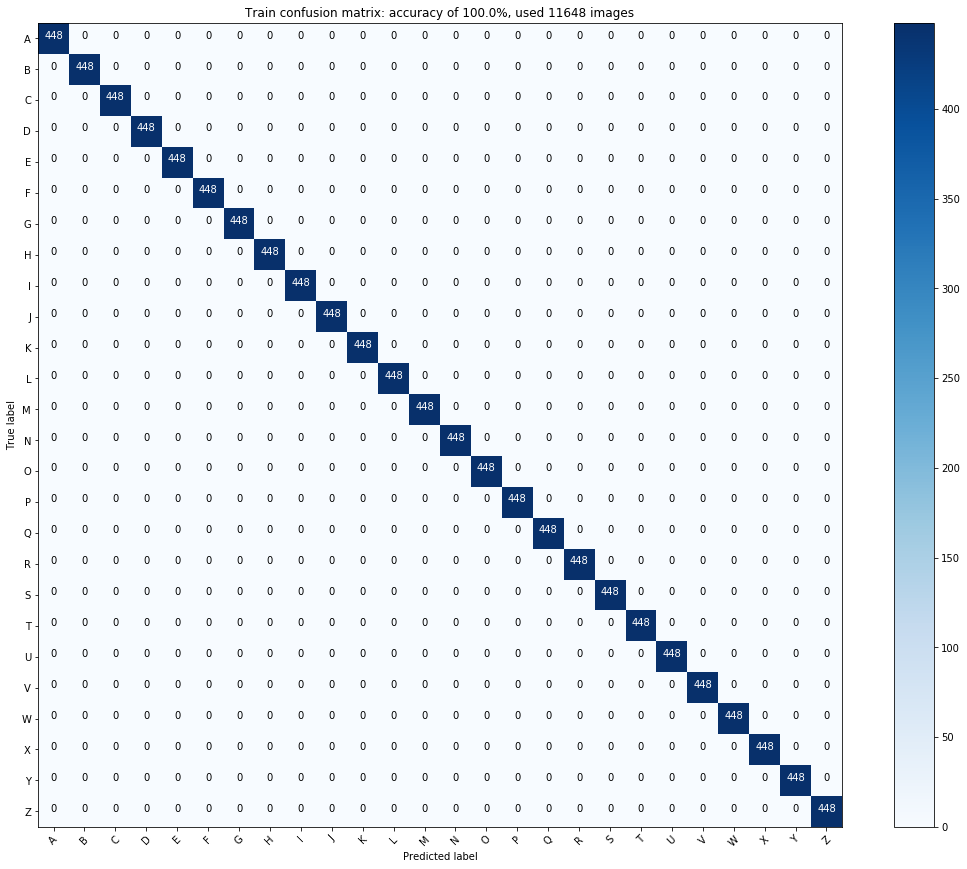

In [10]:
# Compute prediction accuracy on train set
def visualize_knnModel():
    predicted = knn_classificator.predict(X_train)
    print("The accuracy for test database is: " + str(round((accuracy_score(Y_train, predicted) * 100), 3)) + "%")

    print("Using: " + str(len(X_train)) + " images")
    
    plot_confusion_matrix(knn_classificator, X_train, Y_train)
    plt.title('Train confusion matrix: accuracy of ' + str(round((accuracy_score(Y_train, predicted) * 100), 3)) + "%, used " + str(len(X_train)) + " images")
    plt.savefig('./Results/knn/train')

visualize_knnModel()

The accuracy for test database is: 38.255%
Using: 2912 images


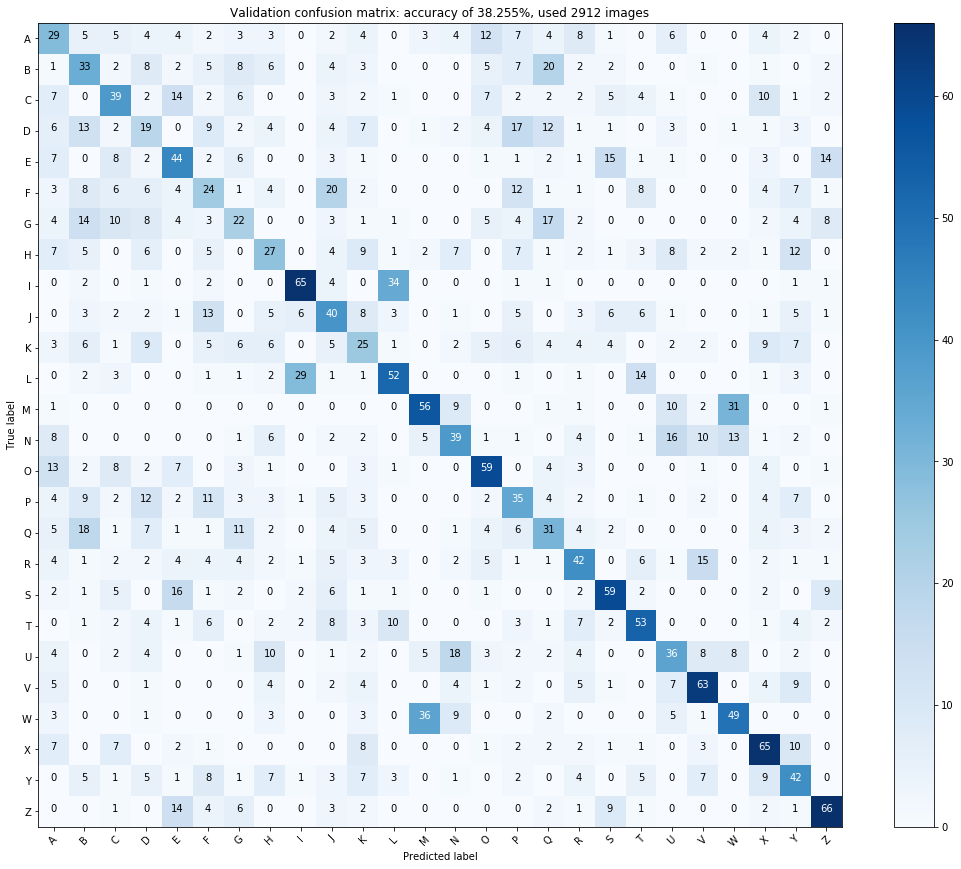

In [11]:
# Compute prediction accuracy on validation set
def validation_knnModel():
    predicted = knn_classificator.predict(X_validation)
    print("The accuracy for test database is: " + str(round((accuracy_score(Y_validation, predicted) * 100), 3)) + "%")

    print("Using: " + str(len(X_validation)) + " images")
    
    plot_confusion_matrix(knn_classificator, X_validation, Y_validation)
    plt.title('Validation confusion matrix: accuracy of ' + str(round((accuracy_score(Y_validation, predicted) * 100), 3)) + "%, used " + str(len(X_validation)) + " images")
    plt.savefig('./Results/knn/validation')
    
validation_knnModel()

## Hyperparameters study

This part consist on making a study of the hyperparameters of the KNN model classifier, we made a study on the influence of the number of neighbors

In [12]:
# Define the parameter values that should be searched
k_range = list(range(1, 30))

# Another parameter besides k that we might vary is the weights parameters or even the algorithm
#weight_options = ['uniform', 'distance']
#algorithm_options = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Specify "parameter grid"
param_grid = dict(n_neighbors=k_range)#, weights=weight_options)

# Specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range)#, weights=weight_options)

# Since both parameters are discrete, so param_dist is the same as param_grid

# Finally define the classifier, in this case the KNN classifier
knn = KNeighborsClassifier()

In [13]:
%%time

# This block copmutes the accuracy when making the gridsearch and randomsearch

grid_best_scores = []
grid_best_params = []
grid_best_estimator = []

rand_best_scores = []
rand_best_params = []
rand_best_estimator = []

for i in list(range(15)):
    print i
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs = -1)
    grid.fit(X_train, Y_train)
    grid_best_scores.append(grid.best_score_)
    grid_best_params.append(grid.best_params_)
    grid_best_estimator.append(grid.best_estimator_)

    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, n_jobs = -1)
    rand.fit(X_train, Y_train)
    rand_best_scores.append(rand.best_score_)
    rand_best_params.append(rand.best_params_)
    rand_best_estimator.append(rand.best_estimator_)
    
print("Finished searching the hyper parameters!")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Finished searching the hyper parameters!
CPU times: user 1h 1min 37s, sys: 3min 14s, total: 1h 4min 51s
Wall time: 1h 1min 3s


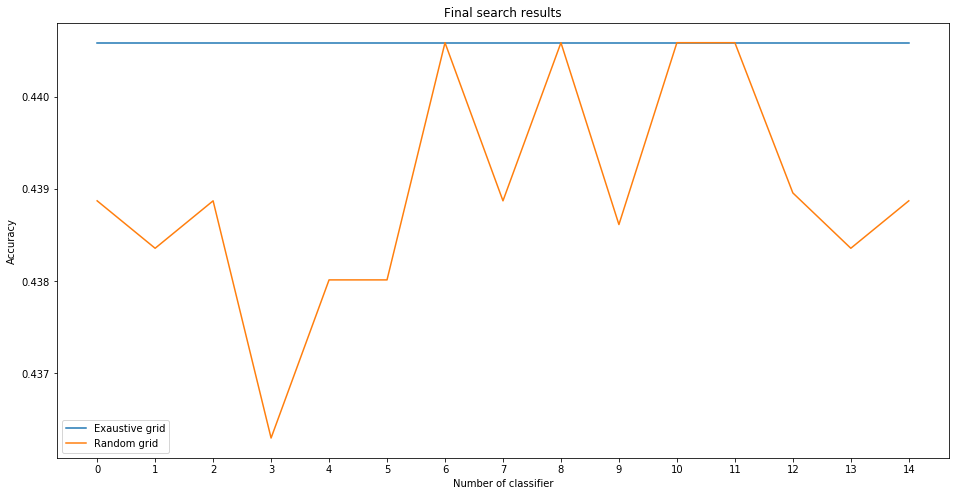

GRID SEARCH RESULTS
The best accuracy is: 44.059065934065934%
The parameters is: {'n_neighbors': 23}


RANDOMGRID SEARCH RESULTS
The best accuracy is: 44.059065934065934%
The parameters is: {'n_neighbors': 23}


In [14]:
# This block draw accuracies of the differents classifiers used in the grid and random search

plt.figure(figsize=(16, 8))
plt.title("Final search results")   
plt.plot(range(len(grid_best_scores)), grid_best_scores, label = 'Exaustive grid')
plt.plot(range(len(rand_best_scores)), rand_best_scores, label = 'Random grid')
plt.xlabel('Number of classifier')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(len(grid_best_scores)))
plt.show()

print("GRID SEARCH RESULTS")
print("The best accuracy is: " + str(np.max(grid_best_scores) * 100) + "%")
print("The parameters is: " + str(grid_best_params[np.argmax(grid_best_scores)]))
print('\n')
print("RANDOMGRID SEARCH RESULTS")
print("The best accuracy is: " + str(np.max(rand_best_scores) * 100) + "%")
print("The parameters is: " + str(rand_best_params[np.argmax(rand_best_scores)]))

# Best KNN classificator

In [15]:
#Train the best classificator for a N sample of numbers
def train_best_classifier():   
    classificator = rand_best_estimator[np.argmax(rand_best_scores)]

    return classificator.fit(X_train, Y_train)

In [16]:
best_knn_classificator = train_best_classifier()

In [18]:
# Load database from the .npy file
X_test, Y_test = separate_array(np.load('./../test_classes.npy'))

The accuracy for test database is: 43.324%
Using: 3640 images


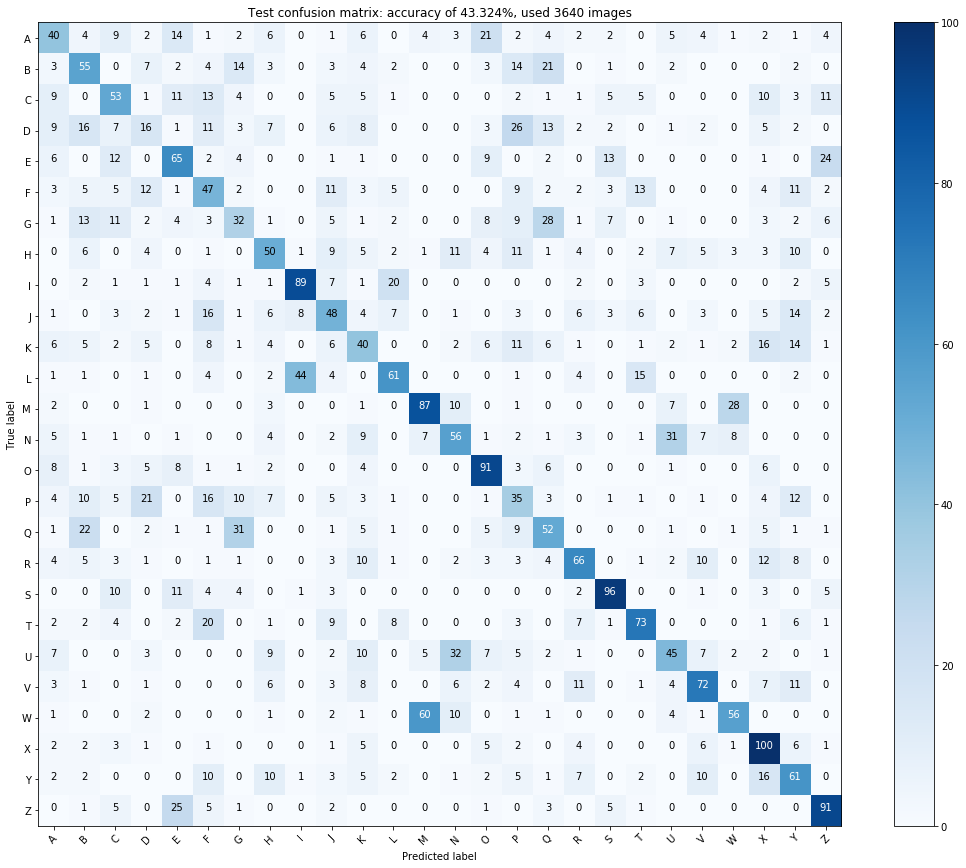

In [19]:
# Compute prediction accuracy on testing set
def test_knnModel():
    predicted = best_knn_classificator.predict(X_test)
    print("The accuracy for test database is: " + str(round((accuracy_score(Y_test, predicted) * 100), 3)) + "%")

    print("Using: " + str(len(X_test)) + " images")
    
    plot_confusion_matrix(best_knn_classificator, X_test, Y_test)
    plt.title('Test confusion matrix: accuracy of ' + str(round((accuracy_score(Y_test, predicted) * 100), 3)) + "%, used " + str(len(X_test)) + " images")
    plt.savefig('./Results/knn/test')

test_knnModel()

In [20]:
# save the classifier
filename = './../application/knn/knn_classifier.sav'
joblib.dump(knn_classificator, filename, compress = 3)  

['./../application/knn/knn_classifier.sav']

In [21]:
# save the classifier
filename = './../application/knn/best_knn_classifier.sav'
joblib.dump(best_knn_classificator, filename, compress = 3)  

['./../application/knn/best_knn_classifier.sav']